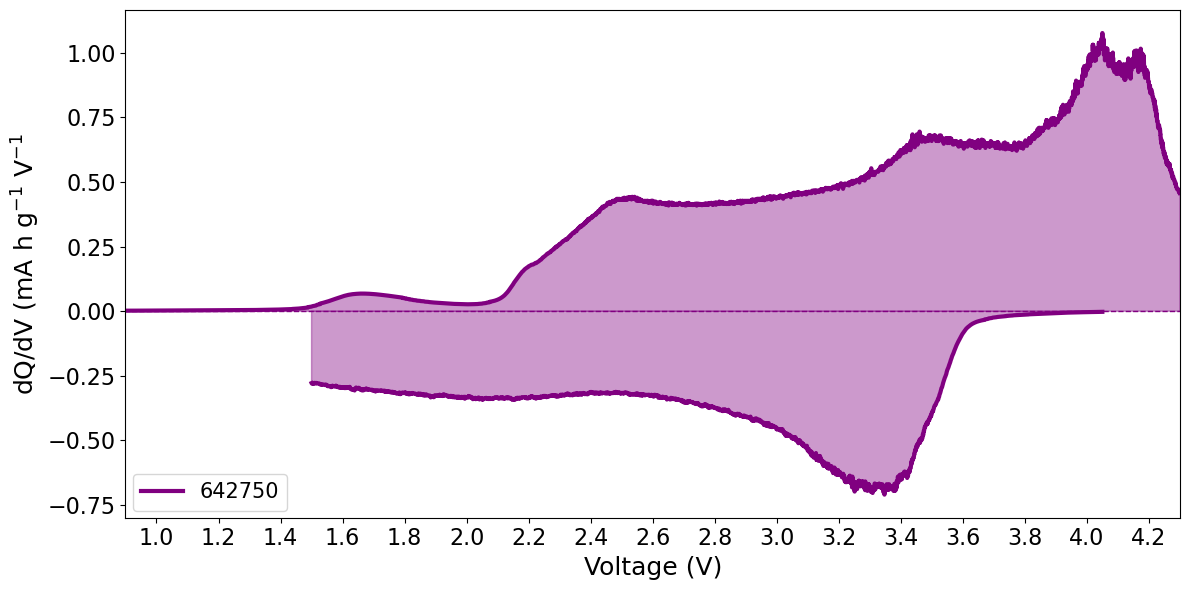

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

directory = '/Users/harryfyjis-walker/Desktop/Part II Stuff/Electrochem Data for analaysis/dqdv'

pattern = re.compile(r'\d{6,7}')

target_file = None

for file_name in os.listdir(directory):
    if file_name.endswith('.xlsx'):
       
        match = pattern.search(file_name)
        if match and match.group(0) == '642750':
            target_file = file_name
            break

if target_file:
    
    file_path = os.path.join(directory, target_file)

    data = pd.read_excel(file_path)
    
    # Using moving average fn here to smooth
    window_size = 10  
    smoothed_data = data['Col2'].rolling(window=window_size).mean()
    
    plt.figure(figsize=(12, 6))
    plt.plot(data['Col1'], smoothed_data, label=target_file, linewidth=3, color="purple")  # Increase linewidth
    
    plt.fill_between(data['Col1'], smoothed_data, color='purple', alpha=0.4)  # Fill with green color with 50% opacity
    
   
    plt.xlabel('Voltage (V)', fontsize=18)
    plt.ylabel('dQ/dV (mA h g$^{-1}$ V$^{-1}$', fontsize=18)
    
    plt.xticks(ticks=[1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4], fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(0.9,4.3)
    
    plt.plot([0, 4.3], [0, 0], color='purple', linestyle='--', linewidth=1)

    legend_labels = ['642750']
    legend_colors = ['purple']

    handles = [plt.Line2D([0], [0], color=color, linewidth=3) for color in legend_colors]
    plt.legend(handles, legend_labels, loc='center', bbox_to_anchor=(0.08, 0.05), fontsize=15, title_fontsize=12, ncol=2)

    plt.tight_layout()
    
    output_file = "/Users/harryfyjis-walker/Desktop/Part II Stuff/figures/642750DQDV.pdf"
    plt.savefig(output_file, format='pdf', bbox_inches='tight') 
    
    plt.show()
    
   

